# ADS Homework 2. part 1

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


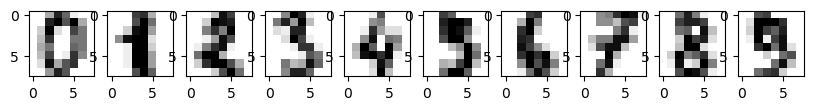

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [5]:
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [6]:
#set target variable (y) as index
data

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,9.0,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,8.0,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,9.0,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
data.set_index('y',inplace=True)

In [8]:
# apply standardization to the pixels data (even though the features are grayscale pixels this way it might be useful to account for heterogenous density in different areas)
data2S=(data-data.mean())/data.std()
data2S_clean = data2S.drop(columns='x1')
data2S_clean=data2S_clean.dropna(axis=1)

In [9]:
#perform PC decomposition over data
#Plot explained variance per number of leading PC's 
pca = PCA(data2S_clean.shape[1])

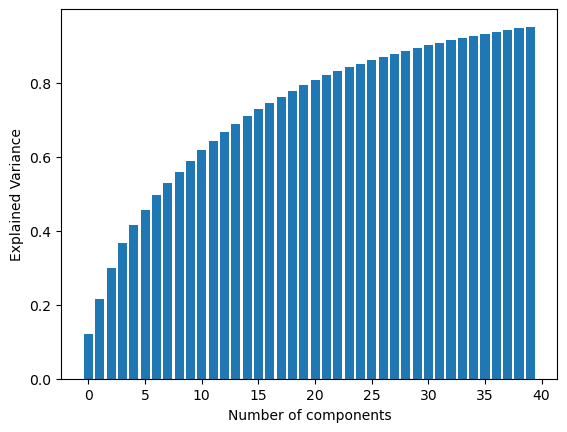

In [10]:
pca = PCA(data2S_clean.shape[1])
dataP=pca.fit_transform(data2S_clean)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

# describe in a few words what you can infer from the above plot

a small number of principal components capture the majority of the data's variance.

### Task 2: Now use three leading PCs to visualize the digits (a 3d scatterplot in PC space with different colors representing different digits)

In [12]:
#reapply PCA with three components so we can visualize in 3 dimensions
pca_3d = PCA(n_components=3)
data_3d = pca_3d.fit_transform(data2S_clean)


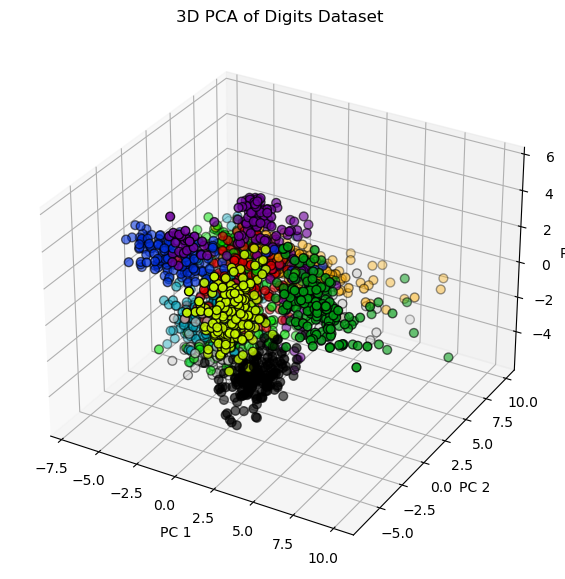

In [13]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Using the original 'y' as color
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=digits.target, cmap=plt.cm.nipy_spectral, edgecolor='k', s=40)
ax.set_title("3D PCA of Digits Dataset")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.show()


### Task 3: Find examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (provide 3 examples each on separate plots)

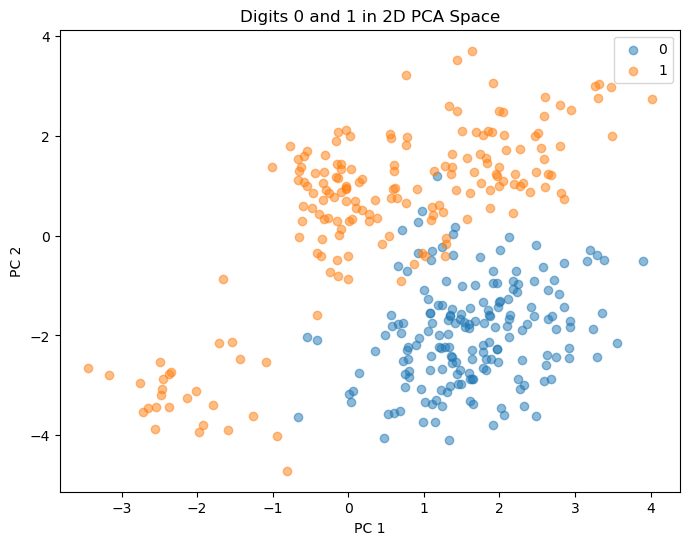

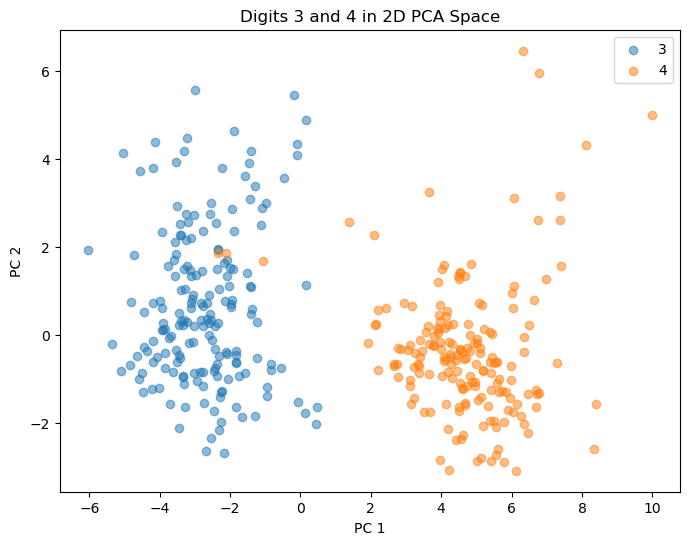

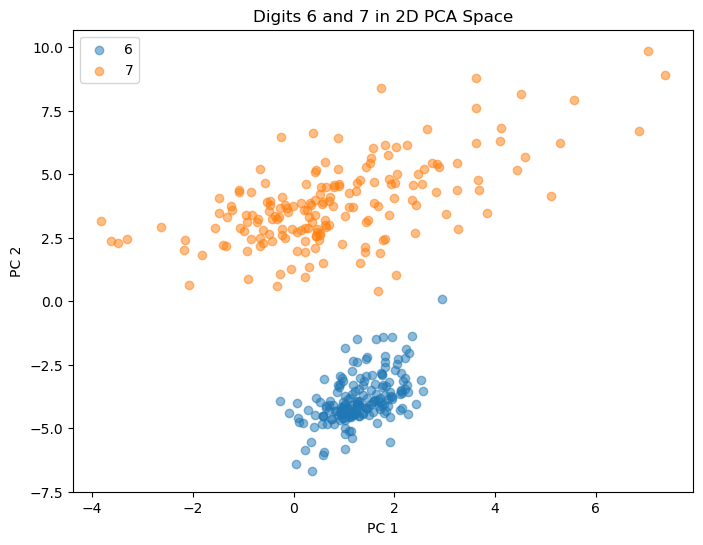

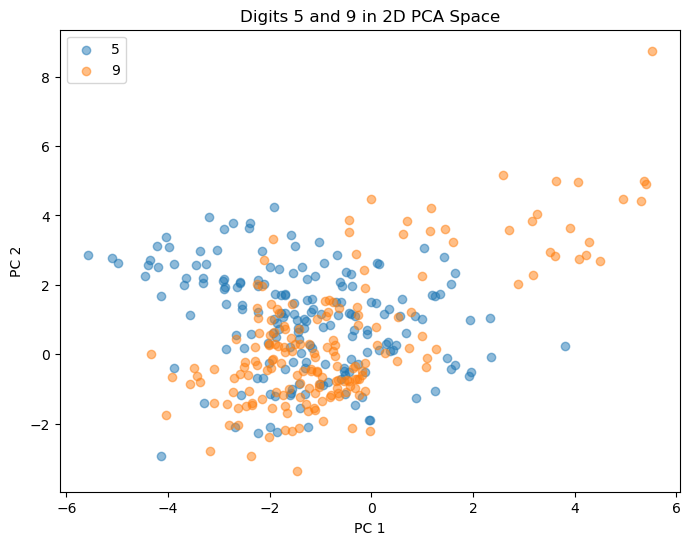

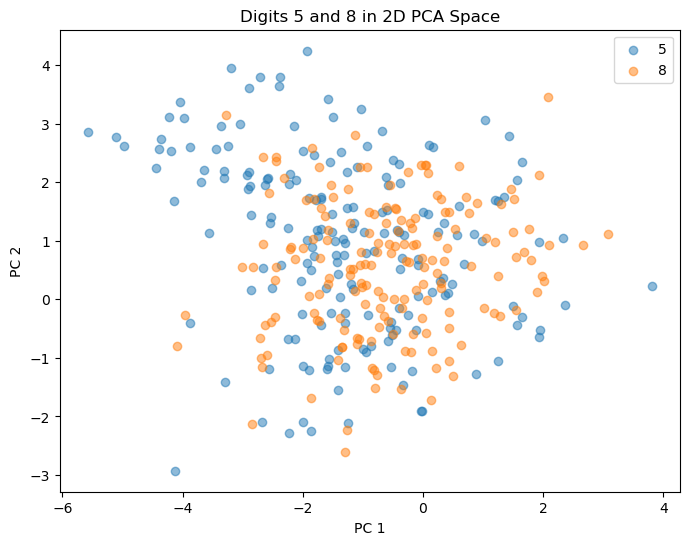

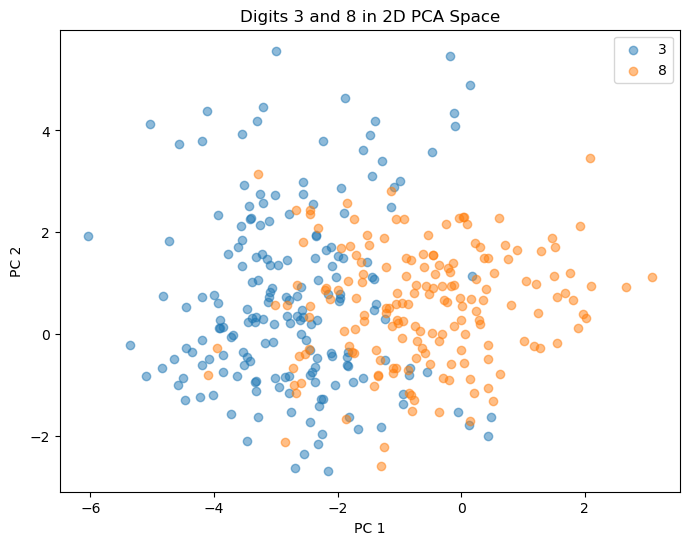

In [14]:
# Applying PCA with two components
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data2S_clean)

# Function to plot 2D scatter for specific digit pairs
def plot_digit_pairs(digit1, digit2):
    idx1 = digits.target == digit1
    idx2 = digits.target == digit2
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2d[idx1, 0], data_2d[idx1, 1], label=str(digit1), alpha=0.5)
    plt.scatter(data_2d[idx2, 0], data_2d[idx2, 1], label=str(digit2), alpha=0.5)
    plt.legend()
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(f'Digits {digit1} and {digit2} in 2D PCA Space')
    plt.show()

# Can be distinguished
plot_digit_pairs(0, 1)
plot_digit_pairs(3, 4)
plot_digit_pairs(6, 7)

# Cannot be clearly distinguished
plot_digit_pairs(5, 9)
plot_digit_pairs(5, 8)
plot_digit_pairs(3, 8)
